# KNN with Iris

*This example is based on {cite:t}`Vanderplas2016` and a code tutorial from Alex Staravoita's app [tinkerstellar](https://tinkerstellar.com/).*

In [16]:
# Setup
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import neighbors

import pylab as pl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Iris data

In this tutorial, we use the famous [iris flower](https://en.wikipedia.org/wiki/Iris_flower_data_set) data set. We want to predict the species of iris given a set of measurements of its flower.

In [17]:
iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [18]:
n_samples, n_features = iris.data.shape

print((n_samples, n_features))

(150, 4)


In [19]:
print(iris.data[0])

[5.1 3.5 1.4 0.2]


In [20]:
print(iris.target.shape)

(150,)


In [21]:
print(iris.target)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [28]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


/tmp/ipykernel_1076542/1304753820.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))


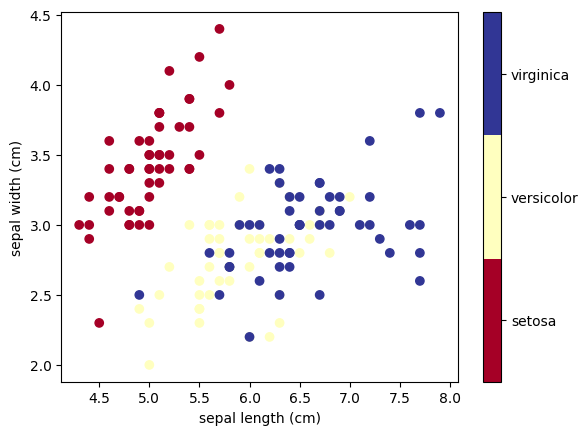

In [23]:
# HIDE CODE

x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))

plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

## Classification model

We use K-nearest neighbors (k-NN), which is one of the simplest learning strategies:

- given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

Let's try it out on our iris classification problem:

1. Prepare the data
1. Initialize the model object
1. fit the model to the data
1. Make a prediction

In [24]:
X, y = iris.data, iris.target

clf = neighbors.KNeighborsClassifier(n_neighbors=5)

clf.fit(X, y)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


- Now that we have a model 'trained' using our dataset, we can use the `.predict()` method to get a prediction for an arbitrary data point.

- What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?

In [25]:
result = clf.predict([[3, 5, 4, 2],])

print(iris.target_names[result])

['versicolor']


- You can also do probabilistic predictions, i.e. check individual probability of this data point belonging to each of the classes:

In [26]:
clf.predict_proba([[3, 5, 4, 2],])

array([[0. , 0.8, 0.2]])

- Let's visualize k-NN predictions on a plot.

*We take a 'slice' of the original dataset, taking only the first two features. This is because we will drawing a 2D plot, where we can only visualize two features at a time. Then we fit a new k-NN model to this slice, using only two features from the original data. Next, we paint a 'map' of predicted classes: we fill the plot area using a mesh grid of colored regions, where each region's color is based on the class predicted by the model. Finally, we put the data points from the original dataset on the plot as well (in bold).*

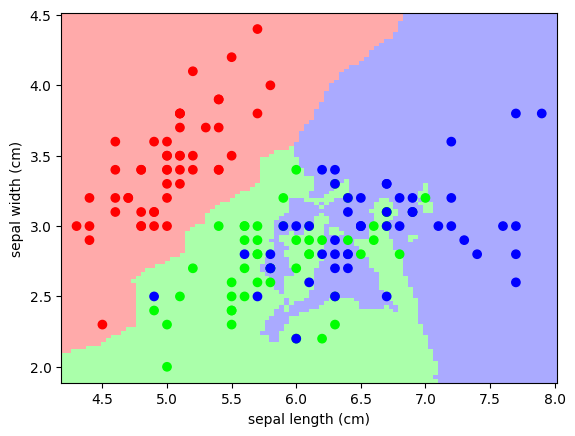

In [27]:
# HIDE CODE

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_iris_knn():
    iris = datasets.load_iris()
    X = iris.data[:, :2]  # we only take the first two features.
    y = iris.target

    knn = neighbors.KNeighborsClassifier(n_neighbors=3)
    knn.fit(X, y)

    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    pl.xlabel('sepal length (cm)')
    pl.ylabel('sepal width (cm)')
    pl.axis('tight')

plot_iris_knn()